In [2]:
from tqdm import tqdm
import easyocr
import os
import cv2
import matplotlib.pyplot as plt

In [4]:
list_path=os.listdir(r"krungthai")

list_path=["krungthai/"+i for i in list_path]
list_path

['krungthai/LINE_ALBUM_slip_230227_108.jpg',
 'krungthai/LINE_ALBUM_slip_230227_109.jpg',
 'krungthai/LINE_ALBUM_slip_230227_10_0.jpg',
 'krungthai/LINE_ALBUM_slip_230227_113.jpg',
 'krungthai/LINE_ALBUM_slip_230227_121.jpg',
 'krungthai/LINE_ALBUM_slip_230227_122.jpg',
 'krungthai/LINE_ALBUM_slip_230227_123.jpg',
 'krungthai/LINE_ALBUM_slip_230227_124.jpg',
 'krungthai/LINE_ALBUM_slip_230227_125.jpg',
 'krungthai/LINE_ALBUM_slip_230227_126.jpg',
 'krungthai/LINE_ALBUM_slip_230227_127.jpg',
 'krungthai/LINE_ALBUM_slip_230227_128.jpg',
 'krungthai/LINE_ALBUM_slip_230227_129.jpg',
 'krungthai/LINE_ALBUM_slip_230227_12_0.jpg',
 'krungthai/LINE_ALBUM_slip_230227_130.jpg',
 'krungthai/LINE_ALBUM_slip_230227_131.jpg',
 'krungthai/LINE_ALBUM_slip_230227_132.jpg',
 'krungthai/LINE_ALBUM_slip_230227_133.jpg',
 'krungthai/LINE_ALBUM_slip_230227_134.jpg',
 'krungthai/LINE_ALBUM_slip_230227_135.jpg',
 'krungthai/LINE_ALBUM_slip_230227_136.jpg',
 'krungthai/LINE_ALBUM_slip_230227_137.jpg',
 'krungt

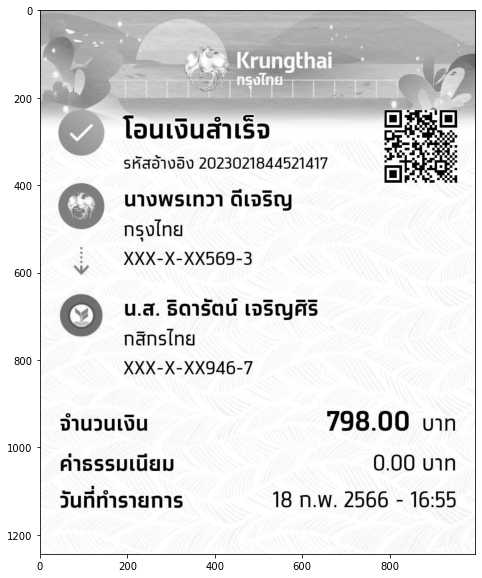

In [61]:
import cv2
import matplotlib.pyplot as plt
img=cv2.imread(list_path[0],0)
#_,img=cv2.threshold(img,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.figure(figsize=(10,10))
plt.imshow(img,"gray")

In [66]:
import easyocr
reader=easyocr.Reader(['th','en'])

ls = reader.readtext(img,detail=0,paragraph=False)
ls

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[' krungthai',
 'กรุงไทย',
 'โอนเงินสำเร็จ',
 'รหัสอ้างอิง 2023021844521417',
 'นางพรเทวา ดีเจริญ',
 'กรุงไทย',
 'xxx-x-xx569-3',
 'น.ส. ธิดารัตน์ เจริญศิริ',
 'กสิกรไทย',
 'xxx-x-xx946-7',
 'จำนวนเงิน',
 '798.00',
 'บาท',
 'ค่าธรรมเนียม',
 'o.0d บาท',
 'วันที่ทำรายการ',
 '18 ก.พ. 2566',
 '16:55']

In [12]:
#Test the bank slip logical
list_path=os.listdir(r"krungthai")
list_path=["krungthai/"+i for i in list_path]
list_path

check_list = []
img_list = []
reader=easyocr.Reader(['th','en'])
for i in tqdm(range(0,10)):
    img = cv2.imread(list_path[i],0)
    ls = reader.readtext(img,detail=0,paragraph=False)
    if 'rungtha' in ls[0] or sum(1 for w in ls if 'รุงไท' in w) >= 2:
        check_list.append("1")
    else:
        check_list.append("0")
    img_list.append(ls)


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
100%|██████████| 10/10 [02:31<00:00, 15.18s/it]


In [13]:
check_list

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1']

In [10]:
#Check with all bank slip
Bank_list = ['baac','bbk','kbank','krungsri','krungthai','memo','scb','ttb']

for i in Bank_list:
    list_path = os.listdir(i)
    list_path = [os.path.join(i, j) for j in list_path]

    check_list = []
    img_list = []
    reader=easyocr.Reader(['th','en'])
    for k in tqdm(range(0,7)):
        img = cv2.imread(list_path[k],0)
        if img is not None:  # check if image was loaded correctly
            ls = reader.readtext(img,detail=0,paragraph=False)
            if 'rungtha' in ls[0] or sum(1 for w in ls if 'รุงไท' in w) >= 2:
                check_list.append("1")
            else:
                check_list.append("0")
            img_list.append(ls)
        else:
            print(f"Error loading image: {list_path[k]}")
    print(f'check_list_{i}' , check_list)


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
100%|██████████| 7/7 [01:47<00:00, 15.30s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_baac ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [02:14<00:00, 19.20s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_bbk ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [01:56<00:00, 16.66s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_kbank ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [03:31<00:00, 30.20s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_krungsri ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [02:02<00:00, 17.43s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_krungthai ['1', '1', '1', '1', '1', '1', '1']


100%|██████████| 7/7 [05:19<00:00, 45.70s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_memo ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [03:03<00:00, 26.17s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_scb ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [08:04<00:00, 69.18s/it] 

check_list_ttb ['0', '0', '0', '0', '0', '0', '0']
